# Segmentation clientèle

## Description du projet :

Ce projet vise à développer un modèle d’intelligence artificielle capable de segmenter automatiquement une base de clients en groupes homogènes. L’objectif est d’identifier des profils distincts à partir de données démographiques et comportementales, afin d’aider les entreprises à mieux comprendre leurs clients, personnaliser leurs offres et optimiser leurs stratégies marketing.



## Objectif :

Construire un modèle de clustering performant permettant de regrouper les clients selon leurs caractéristiques communes. Le but est de fournir une segmentation exploitable et cohérente, facilitant l’analyse des comportements d’achat, la définition de cibles marketing et la mise en place d’actions commerciales différenciées.



## Type de données :

Le projet utilise des données tabulaires comprenant typiquement :

* Âge
* Sexe
* Revenu annuel
* Score de dépense ou comportement d’achat
* Fréquence ou historique d’achats (selon le dataset exact)
* Autres caractéristiques démographiques ou comportementales
  *(Aucune variable cible n’est fournie, car le problème est non supervisé.)*



## Contexte métier :

La segmentation de la clientèle est un enjeu majeur pour les équipes marketing, commerciales et CRM. Les entreprises doivent adapter leurs stratégies à des groupes de clients aux comportements variés : clients à forte valeur, jeunes acheteurs occasionnels, consommateurs sensibles aux promotions, etc.
Sans segmentation, les actions marketing peuvent devenir génériques, inefficaces ou coûteuses.
L’utilisation d’algorithmes de clustering permet d’obtenir automatiquement des groupes cohérents, fondés sur les données réelles, pour améliorer :

* la personnalisation de l’offre,
* la fidélisation,
* le ciblage marketing,
* la compréhension du comportement client.



## Objectif final :

* **Problème traité :** Clustering (segmentation automatique de clients en groupes homogènes)
* **Évaluation :** Utilisation d’indicateurs internes comme le score de silhouette, l’inertie et l’analyse de la cohérence des clusters
* **Livrable :** Un modèle de segmentation capable d’être intégré dans un CRM, un outil marketing, un tableau de bord analytique ou des systèmes de recommandation, permettant une compréhension approfondie et actionnable de la base clients.



###  **1.Collecte et chargement des données**

* Importation des datasets de calories et exercices (ex. CSV ou base de données).
* Vérification des colonnes et types de variables.
* Aperçu rapide des premières lignes pour comprendre la structure des données.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import plotly.express as px

In [2]:
# Charger le dataset
df = pd.read_csv(r'C:\Users\ins expertise\Downloads\Mall_Customers.csv')

# Afficher les informations de base
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f" Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*80 + "\n")

# Aperçu des données
display(df.head())
print("\n" + "="*80 + "\n")

# Informations sur les colonnes
df.info()

Dimensions: 200 lignes × 5 colonnes
 Taille mémoire: 0.02 MB




CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\Users\ins expertise\AppData\Local\Temp\ipykernel_3228\2032168332.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

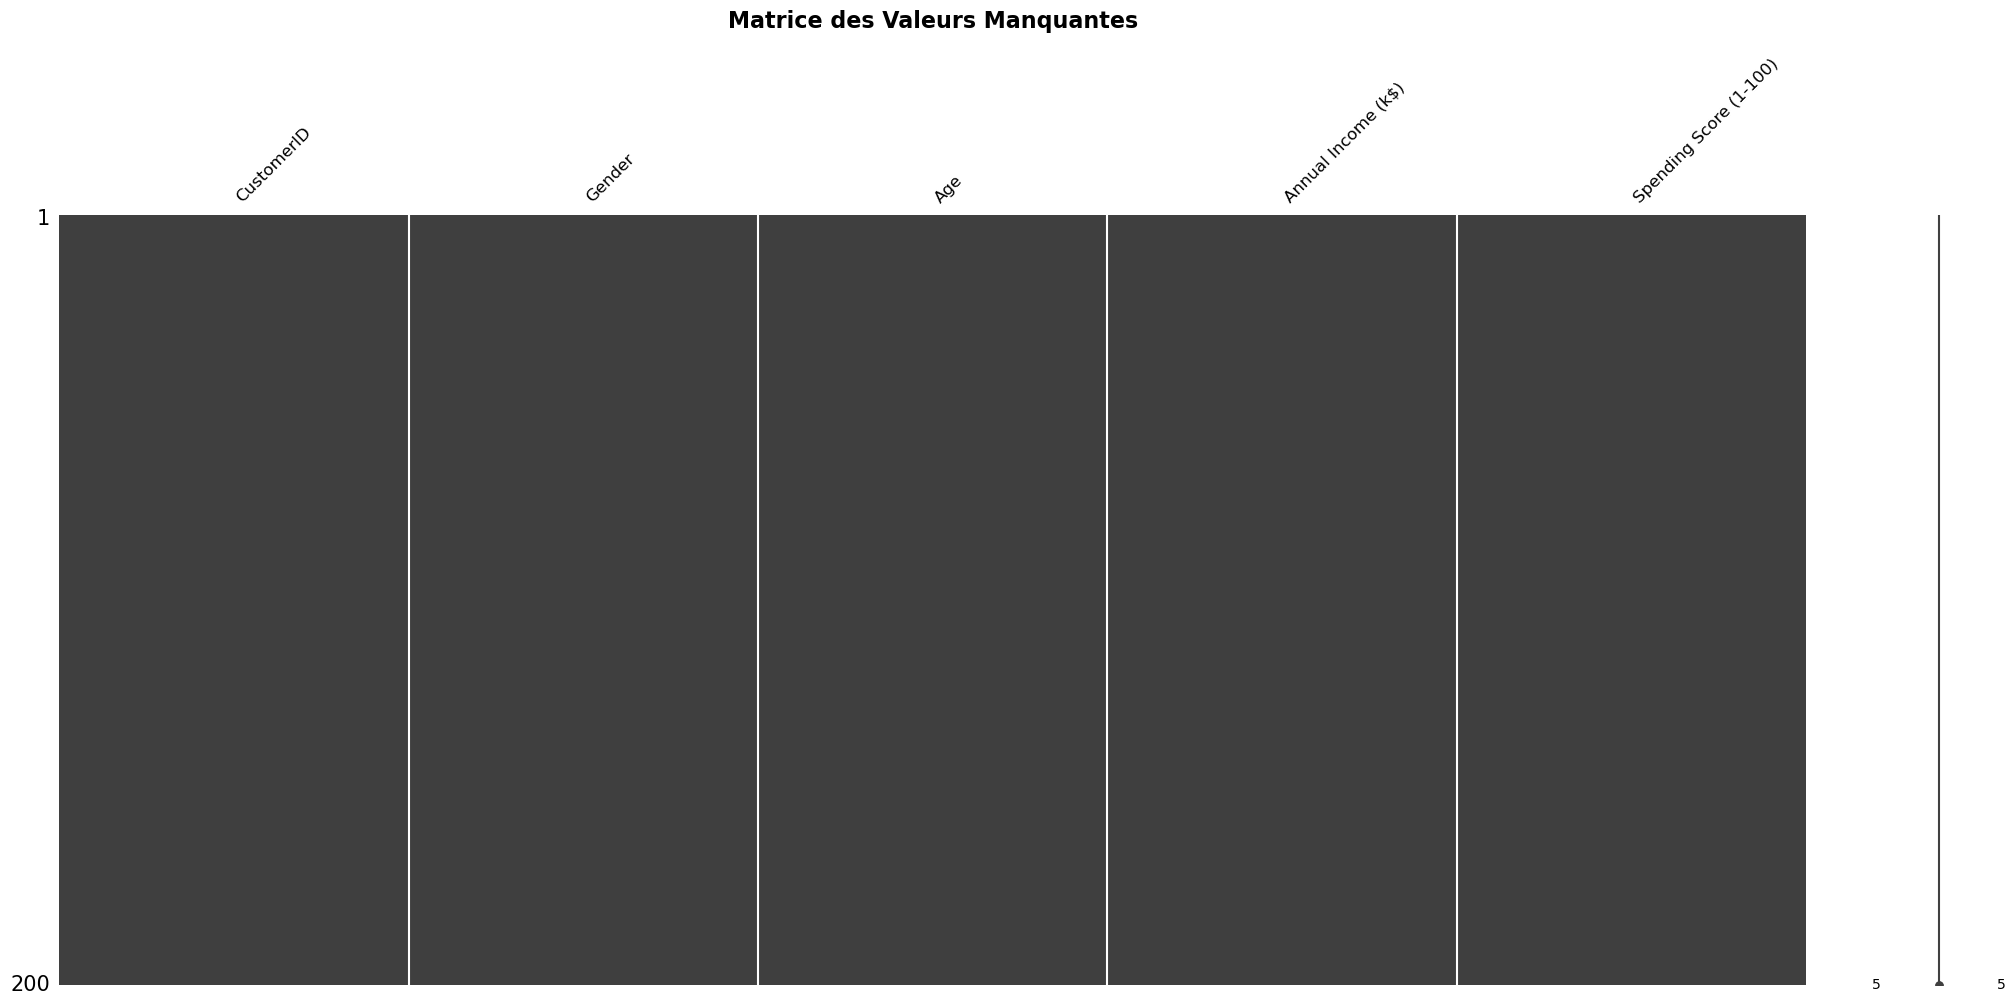


📊 Statistiques des Valeurs Manquantes:



Empty DataFrame
Columns: [Nombre_Missing, Pourcentage_Missing]
Index: []

In [3]:
# Matrice de visualisation des valeurs manquantes
plt.figure(figsize=(14, 8))
msn.matrix(df, fontsize=12, sparkline=True)
plt.title("Matrice des Valeurs Manquantes", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Statistiques des valeurs manquantes
missing_stats = pd.DataFrame({
    'Nombre_Missing': df.isnull().sum(),
    'Pourcentage_Missing': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Pourcentage_Missing', ascending=False)

print("\n📊 Statistiques des Valeurs Manquantes:\n")
display(missing_stats[missing_stats['Nombre_Missing'] > 0])

Aucune valeur n’est manquante dans l’ensemble de données. Chaque colonne présente un nombre nul de valeurs absentes, ce qui confirme que les données sont complètes et qu’aucune imputation n’est nécessaire pour aucun attribut. Cette complétude est essentielle afin d’assurer la fiabilité et l’exhaustivité de l’ensemble lors des analyses futures.

In [4]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [5]:
df.duplicated().sum()

0

L’ensemble de données ne présente aucune valeur dupliquée. Cette absence de doublons est essentielle pour préserver l’intégrité et la fiabilité de l’ensemble de données, en garantissant que chaque enregistrement de transaction est unique et en évitant toute distorsion potentielle lors des analyses ultérieures.

# 2. Analyse exploratoire des données (EDA)

- Étude de la distribution des variables numériques (âge, taille, poids, durée, fréquence cardiaque, température corporelle).  
- Analyse de la variable cible : répartition du nombre de calories brûlées.  
- Visualisation des différences entre profils (par exemple : hommes vs femmes, variation des calories selon l’âge ou la fréquence cardiaque).  
- Identification d’éventuelles anomalies ou valeurs extrêmes (outliers) dans les mesures physiologiques ou les données d’exercice.  
- Analyse des corrélations entre les différentes variables et avec la variable cible (calories brûlées) afin d’identifier les facteurs les plus influents.

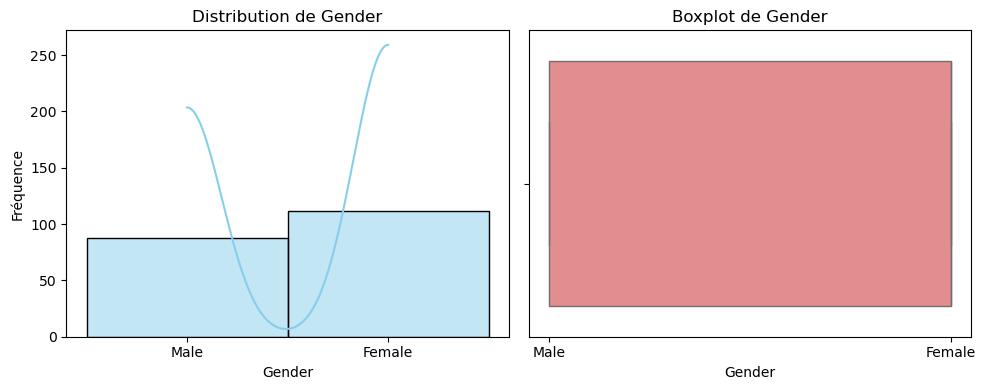

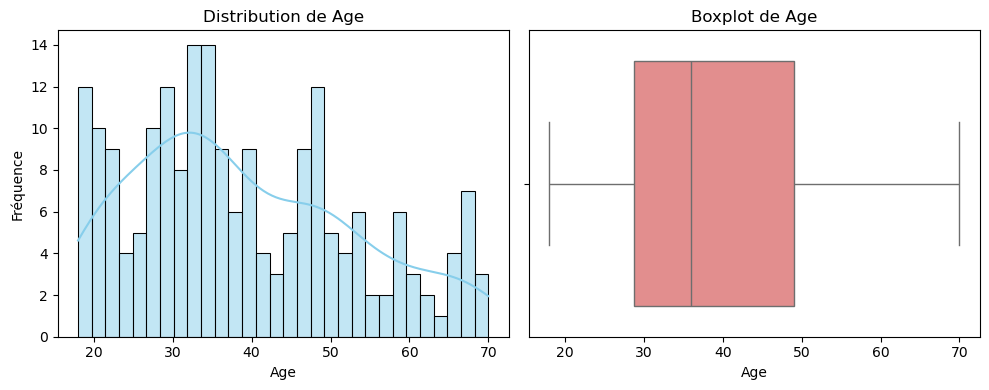

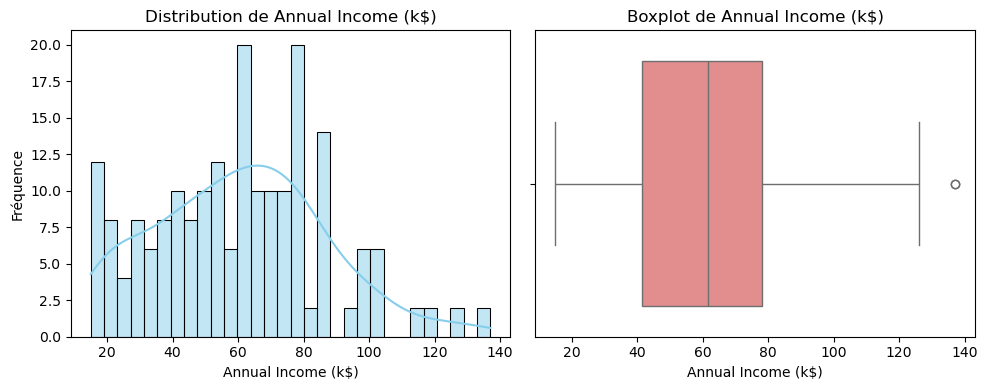

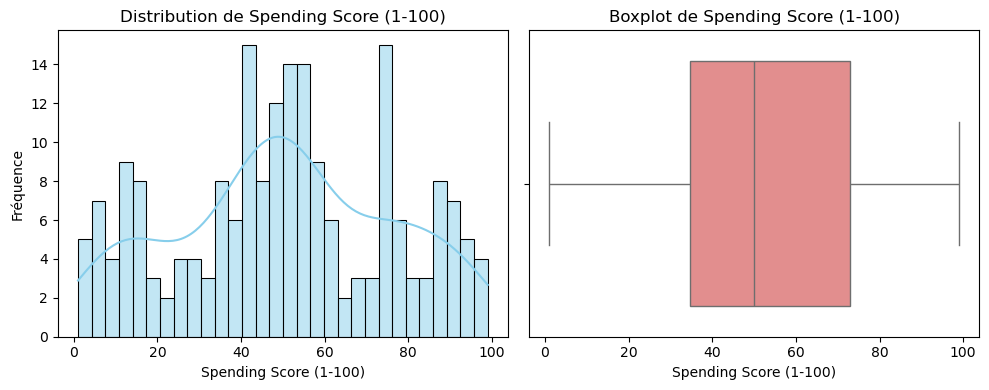

In [7]:
cols = ['Gender',	'Age',	'Annual Income (k$)',	'Spending Score (1-100)']



for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Histogramme + KDE
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f"Distribution de {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Fréquence")
    
    # Boxplot
    sns.boxplot(x=df[col], color='lightcoral', ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()



## **Gender (Genre)**

### **Distribution**

* La répartition entre hommes et femmes semble relativement équilibrée, mais **les femmes sont légèrement plus nombreuses** que les hommes dans le dataset.
* Aucun déséquilibre majeur, ce qui est positif pour l’analyse : le modèle ou le clustering ne sera pas fortement biaisé par une catégorie.

### **Boxplot**

* Le boxplot montre deux catégories nominales sans valeurs extrêmes.
* Rien d’anormal : le genre est une variable catégorielle sans dispersion numérique.


# **Age (Âge)**

### **Distribution**

* La distribution présente plusieurs pics, ce qui indique une **population hétérogène**.
* Les âges se concentrent principalement entre **25 et 45 ans**, avec un second groupe entre **45 et 60 ans**.
* Quelques valeurs existent entre **60 et 70 ans**, mais beaucoup plus rares.
* Pas d’indice d’anomalie, mais la distribution n’est pas uniforme → cela influence le clustering.

### **Boxplot**

* Le boxplot montre une médiane autour de **35–40 ans**.
* L’intervalle interquartile est assez large (population variée).
* Pas d’outliers significatifs, donc pas de valeurs aberrantes majeures dans l’âge.


# **Annual Income (k$) – Revenu annuel**

### **Distribution**

* Le revenu annuel est relativement bien réparti entre **20k et 90k**, avec quelques valeurs plus élevées jusqu’à environ **140k**.
* La distribution n’est pas strictement normale : on observe un groupe d’individus dans la zone **40–70k**, et un second autour de **60–90k**.
* Présence d’un revenu plus élevé → possible client premium (potentiel outlier utile pour le clustering).

### **Boxplot**

* La médiane est située autour de **60k**.
* L’essentiel de la population se situe entre **40k et 80k**.
* Un ou deux points situés au-dessus de 120k apparaissent comme **outliers**, mais ils peuvent représenter des clients haut de gamme, donc utiles à conserver.


# **Spending Score (1–100) – Score de dépense**

### **Distribution**

* La distribution est **très étalée**, ce qui indique des comportements d’achat très variés.
* On observe deux masses principales :

  * Une autour de **20–40**
  * Une autre autour de **60–80**
* Cela suggère déjà la présence potentielle de **deux types de clients** : petits dépensiers vs. gros dépensiers.

### **Boxplot**

* Le boxplot montre une dispersion importante, sans outliers majeurs.
* La médiane se situe vers **50**, ce qui est cohérent avec un score entre 1 et 100.
* Cette variabilité élevée est très utile pour K-Means : le score aide beaucoup à différencier des groupes.


# **synthèse**

Les graphiques montrent que les variables présentent :

* des **distributions variées** et intéressantes pour le clustering,
* pas de valeurs aberrantes problématiques,
* une bonne dispersion permettant de former plusieurs clusters pertinents.

**Implications pour K-Means :**

* Age, Annual Income et Spending Score montrent des schémas et des regroupements naturels ⇒ parfaits pour la segmentation.
* Gender ne contribuera qu’en tant que variable catégorielle simple, mais peut aider à interpréter les clusters (ex. : segment majoritairement féminin).

**Première intuition :**

* Les variables Income et Spending Score montrent une structure bimodale →
  cela concorde avec les résultats classiques du dataset Mall Customers, où K-Means crée souvent **4 à 5 clusters** cohérents.




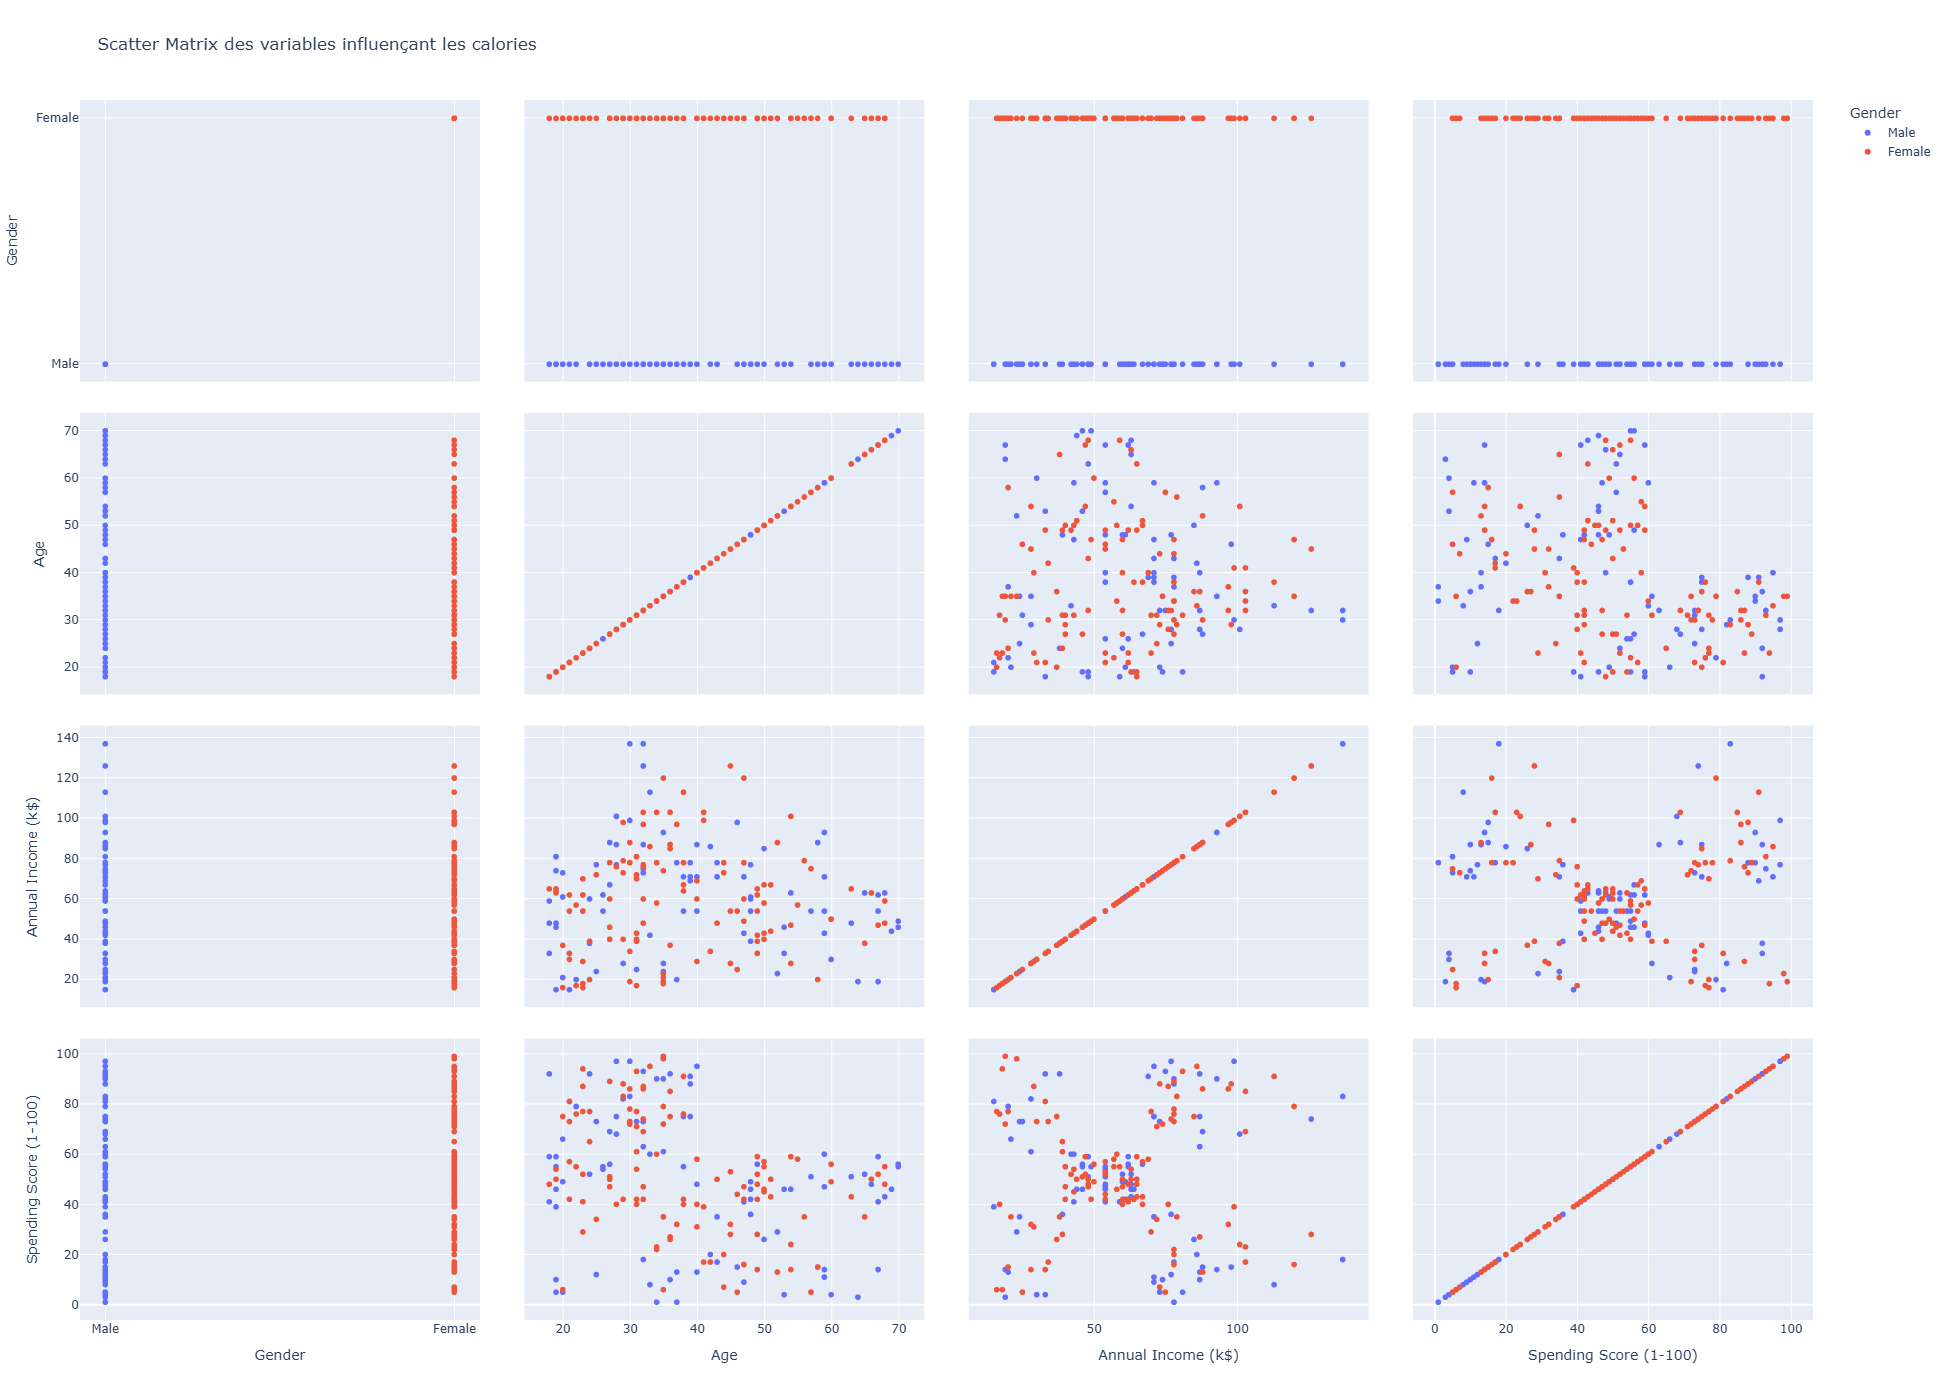

In [9]:
fig = px.scatter_matrix(
    df,
    dimensions=['Gender',	'Age',	'Annual Income (k$)',	'Spending Score (1-100)'],
    color="Gender",
    title="Scatter Matrix des variables influençant les calories",
    width=1400,   # largeur en pixels
    height=1400   # hauteur en pixels
)

fig.show()



# **Interprétation du Scatter Matrix**

## **Gender**

* Les points sont séparés en deux lignes verticales (Male / Female), ce qui est normal pour une variable catégorielle.
* Aucun lien particulier visible entre le genre et les autres variables (Age, Income, Spending Score).
  → Le genre n’influence pas directement ces variables.

## **Age**

* Les points sont assez dispersés par rapport au revenu et au spending score.
  → Pas de relation linéaire entre l’âge, le revenu ou le score de dépense.
* Les individus plus âgés n’ont pas forcément un revenu ou un score de dépense plus élevé.

## **Annual Income (Revenu annuel)**

* Pas de corrélation claire entre le revenu et l’âge.
* Pas de relation visible non plus entre le revenu et le score de dépense :
  certaines personnes avec un faible revenu dépensent beaucoup, et inversement.
  → C’est une indication qu’un clustering pourrait être utile pour révéler des groupes distincts.

## **Spending Score**

* Répartition étalée, sans structure évidente dans les relations avec l’âge ou le revenu.
  → Cela confirme que le comportement d’achat varie fortement d’un individu à l’autre.


# **Synthèse**

* Aucun lien linéaire fort entre les variables : elles sont indépendantes ou faiblement corrélées.
* La dispersion importante dans l’âge, le revenu et le score de dépense suggère qu’un algorithme de clustering (comme K-Means) est approprié pour identifier des groupes de clients distincts.
* Le genre n’apporte pas de tendance particulière, mais il pourra servir à décrire les clusters après segmentation.


# 4. Nettoyage et préparation des données

* Gestion des features inutiles
* Encodage des variables catégorielles (One-Hot)
* preprocessing des data

In [11]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0             1   19                  15                      39         True
1             2   21                  15                      81         True
2             3   20                  16                       6        False
3             4   23                  16                      77        False
4             5   31                  17                      40        False
..          ...  ...                 ...                     ...          ...
195         196   35                 120                      79        False
196         197   45                 126                      28        False
197         198   32                 126                      74         True
198         199   32                 137                      18         True
199         200   30                 137                      83         True

[200 rows x 5 columns]

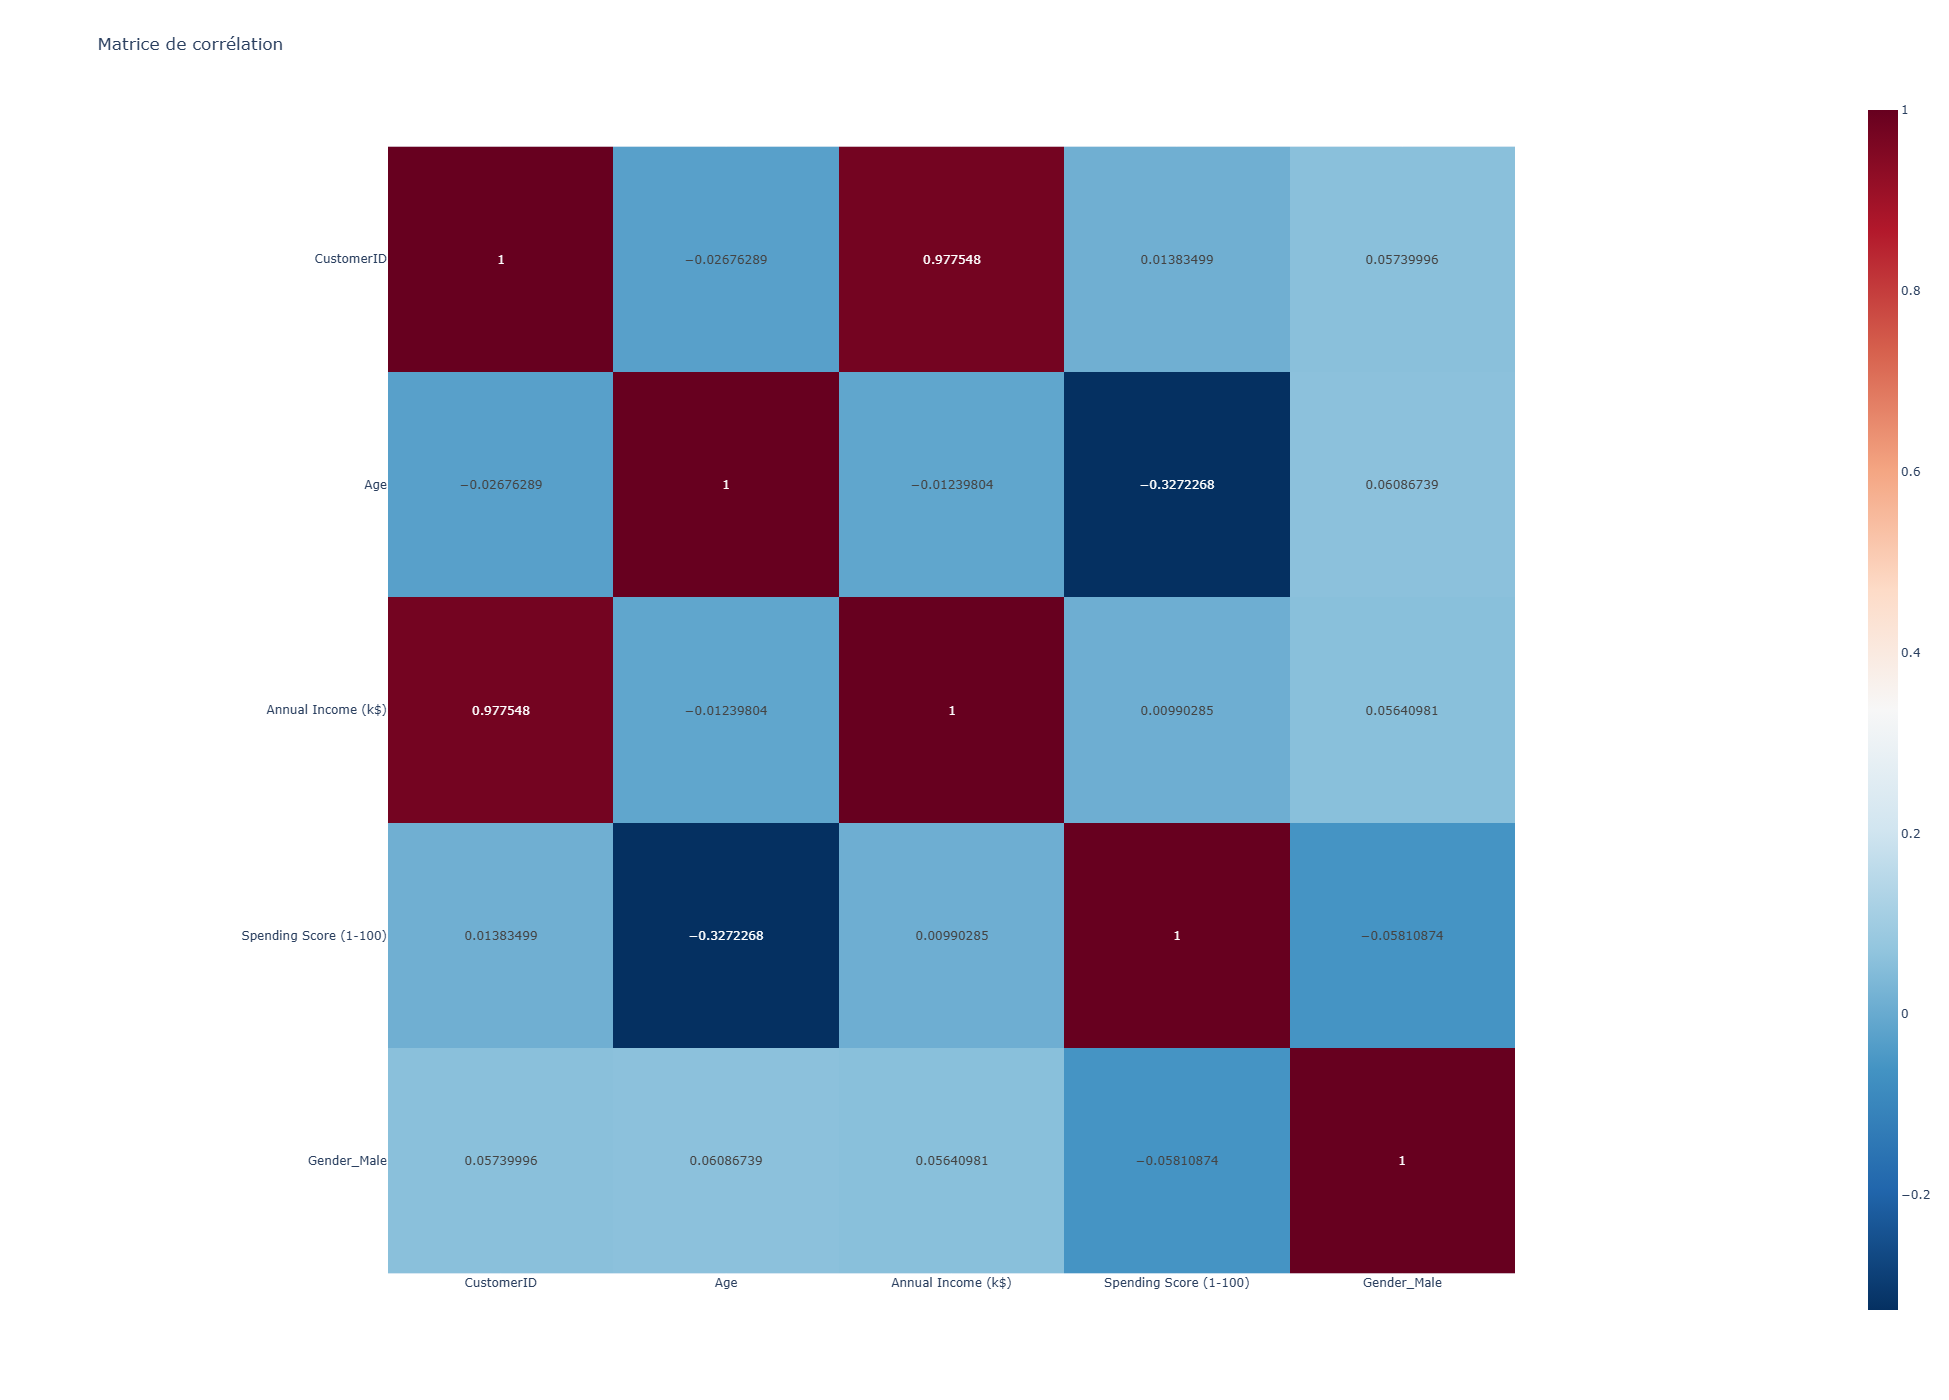

In [12]:
corr = df_encoded.corr()

fig = px.imshow(corr,
                text_auto=True,
                color_continuous_scale="RdBu_r",
                title="Matrice de corrélation",
                width=1400,   # largeur en pixels
                height=1400)   # hauteur en pixels
fig.show()


On retrouve on forte correlatuon negative entre l'âge et le score de dépense ce qui laisse supposer que plus la personne est agé moins son score de dépense est elevé.

# 4.Entrainement des modèles et évaluation

* Définition de X (features) et y (label frauduleux/non frauduleux).
* Split train/test pour validation du modèle (ex. 80% train / 20% test).
* Analyse des métriques

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, 

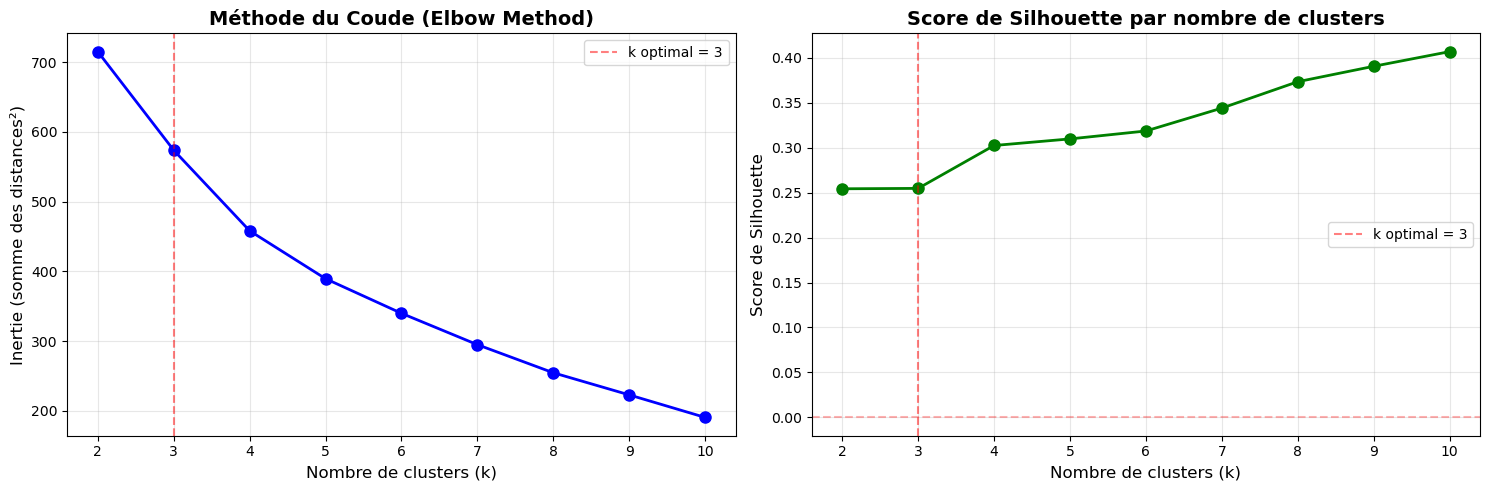

In [17]:
# 3.1 Méthode du coude (Elbow Method)
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique du coude
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertie (somme des distances²)', fontsize=12)
axes[0].set_title('Méthode du Coude (Elbow Method)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=3, color='red', linestyle='--', alpha=0.5, label='k optimal = 3')
axes[0].legend()

# Score de silhouette
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de clusters (k)', fontsize=12)
axes[1].set_ylabel('Score de Silhouette', fontsize=12)
axes[1].set_title('Score de Silhouette par nombre de clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.3)
axes[1].axvline(x=3, color='red', linestyle='--', alpha=0.5, label='k optimal = 3')
axes[1].legend()

plt.tight_layout()
plt.show()

**Elbow mehod**
* L’inertie chute fortement entre k=2 et k=3.
* La chute ralentit nettement après k=3 → apparition du “coude”.
* Les diminutions suivantes (k=4,5,6…) sont progressives et ne justifient pas d’augmenter k.
Le “coude” est clairement à k = 3.

**Courbe des scores de silhouette par k (2 → 10)**
* Le silhouette score reste autour de 0.25–0.30 pour k=2 à k=5.
* Il augmente ensuite jusqu’à ~0.40 vers k=10.

Toutefois, un silhouette score qui augmente avec k ne signifie pas automatiquement qu'il faut choisir un grand k.
→ Plus k augmente, plus les clusters deviennent petits et artificiellement homogènes.

Ce qu’il faut regarder :
Le meilleur compromis entre homogénéité et simplicité est souvent entre 2 et 5.

Dans cette zone, le k = 3 est celui qui donne le meilleur équilibre.

In [21]:
!pip install yellowbrick

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Score de Silhouette (k=2): 0.2542


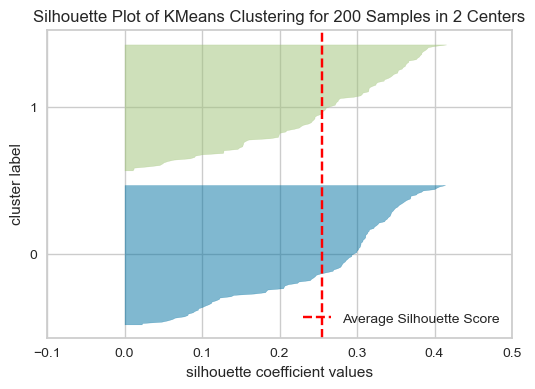

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Score de Silhouette (k=3): 0.2546


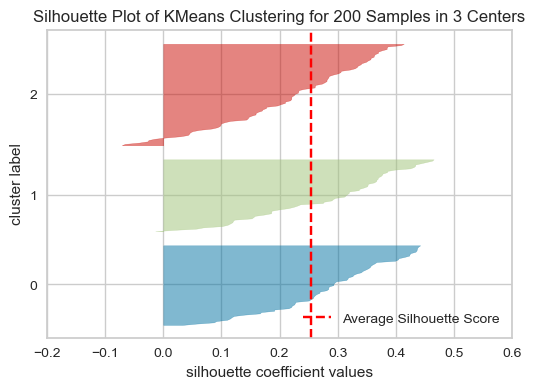

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Score de Silhouette (k=4): 0.3023


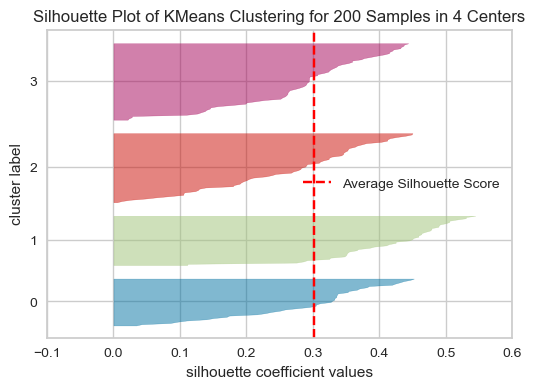

C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Score de Silhouette (k=5): 0.3096


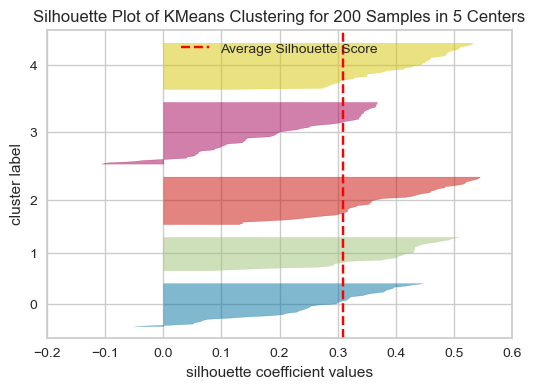

In [38]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"Score de Silhouette (k={k}): {silhouette_avg:.4f}")

    plt.figure(figsize=(6, 4))
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_scaled)  
    visualizer.finalize()
    plt.show()

**k = 2**

Le silhouette score est correct mais pas très élevé.

On observe que l’un des clusters est large mais pas très compact → séparation moyenne.

**k = 3**

Le silhouette score augmente légèrement.

Les clusters semblent mieux définis et plus homogènes.

Le plot montre une meilleure cohérence interne que k=2.

k = 3 donne une meilleure structure que 2.

**k = 4**

Le silhouette score se stabilise ou diminue légèrement.

Les clusters commencent à se chevaucher.

Les tailles sont plus déséquilibrées.

Pas d’amélioration notable par rapport à 3.

**k = 5**

Silhouette global un peu meilleur que 4, mais :

Visuellement, les clusters sont plus morcelés.

Pas un gain suffisant pour justifier une segmentation plus complexe.

Complexité ajoutée sans gain majeur.

In [41]:
# Clustering avec k=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"\n Score de Silhouette (k=3): {silhouette_avg:.4f}")


 Score de Silhouette (k=3): 0.2546


C:\Users\ins expertise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



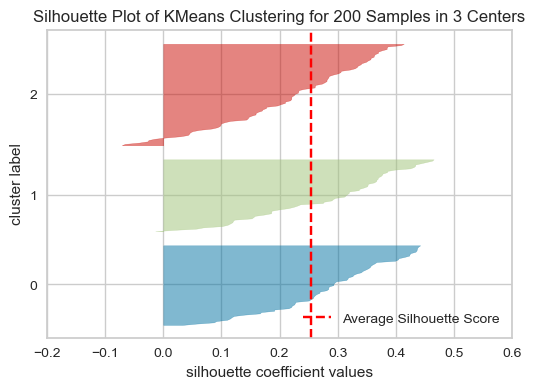

In [42]:
plt.figure(figsize=(6, 4))
visualizer = SilhouetteVisualizer(kmeans_final, colors='yellowbrick')
visualizer.fit(X_scaled)  
visualizer.finalize()
plt.show()

<Figure size 1400x1200 with 0 Axes>

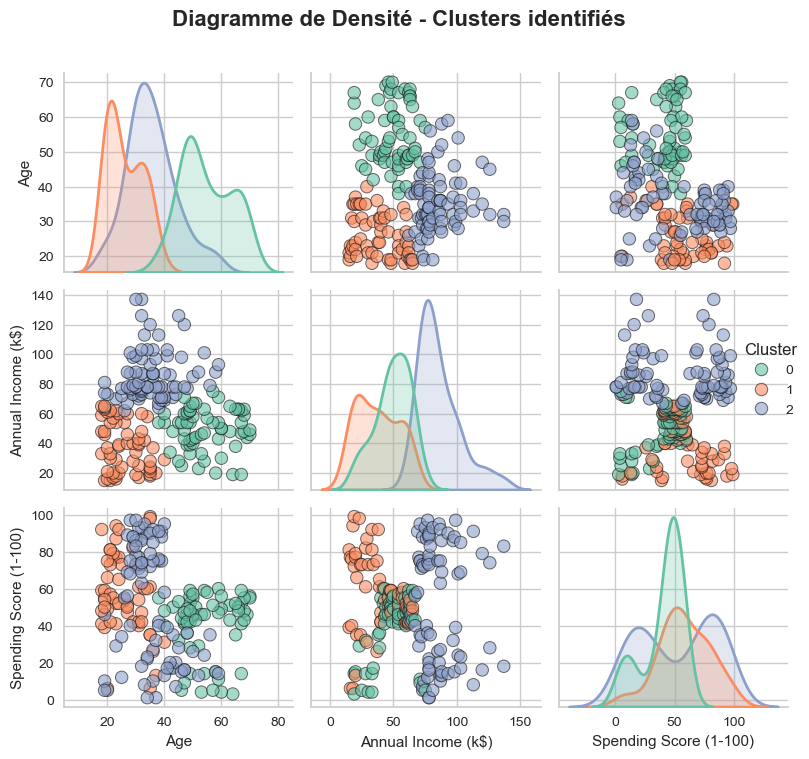

In [44]:
# Diagramme de densité (pairplot avec clusters)
df_plot = pd.DataFrame(df, columns=['Gender',	'Age',	'Annual Income (k$)',	'Spending Score (1-100)'])
df_plot['Cluster'] = clusters

plt.figure(figsize=(14, 12))
sns.pairplot(df_plot, hue='Cluster', palette='Set2', 
             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             diag_kws={'linewidth': 2})
plt.suptitle('Diagramme de Densité - Clusters identifiés', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **5.Interprétation globale de la segmentation en 3 clusters**

L’analyse des données à travers les méthodes de clustering (K-Means), les courbes d’inertie, les scores de silhouette et le diagramme de densité met en évidence une segmentation pertinente en **trois groupes principaux**. Chacun présente un profil distinct en termes d’âge, de revenu annuel et de comportement de dépense. Toutefois, certains chevauchements apparaissent, reflétant la nature progressive des comportements clients.


## **1. Cluster 0 – Jeunes consommateurs à revenus moyens, forte propension à la dépense**

Ce premier groupe est composé principalement de clients âgés de **20 à 40 ans**, avec des revenus annuels **moyens** (30 à 70 k$). Leur score de dépense est **élevé**, ce qui indique une forte appétence pour la consommation.

Ces clients sont réactifs aux actions marketing, sensibles aux nouveautés et potentiellement moteurs de croissance. Ils constituent un segment stratégique pour les campagnes commerciales et les lancements de produits.



## **2. Cluster 1 – Clients jeunes à revenus faibles ou moyens, niveau de dépense modéré**

Le second groupe rassemble une population également jeune, mais dont les revenus sont **plus faibles à moyens** (20 à 50 k$). Leur score de dépense est **modéré**.

Ces clients adoptent un comportement d’achat plus prudent et sont particulièrement sensibles aux prix, aux offres promotionnelles et aux programmes de fidélisation. Ils représentent un segment à travailler dans une logique de consolidation et de montée en gamme progressive.



## **3. Cluster 2 – Clients plus âgés à hauts revenus, faible propension à la dépense**

Le troisième cluster se distingue par une tranche d’âge **plus mature** (souvent entre 40 et 60 ans ou plus) et des revenus **élevés**, pouvant dépasser 100 k$. Malgré ce pouvoir d’achat supérieur, leur score de dépense demeure **faible**.

Il s’agit d’un segment plus rationnel, orienté vers des achats ciblés et de qualité. Les offres premium, les services personnalisés et les arguments de valeur ajoutée sont mieux adaptés à ce groupe.



## **4. Analyse des chevauchements entre les clusters**

Le diagramme de densité révèle des **zones de chevauchement** entre les clusters, particulièrement :

* **Entre les clusters 0 et 1**, qui partagent une tranche d’âge similaire et se situent dans des niveaux de revenus proches. La distinction se fait essentiellement sur le comportement de dépense, ce qui peut occasionner un recouvrement naturel.

* **Entre les clusters 1 et 2**, via une zone intermédiaire dans les revenus (40–60 k$), où certains individus peuvent présenter des caractéristiques hybrides.

* **Sur le score de dépense**, où les comportements ne sont pas strictement disjoints : certains clients du cluster 1 ont des dépenses proches de celles du cluster 0, et certains du cluster 2 se rapprochent ponctuellement des deux autres.

Ce chevauchement est attendu dans une segmentation comportementale : les clients ne forment pas des groupes totalement étanches mais se situent sur un continuum. Le clustering identifie donc des **tendances dominantes**, plutôt que des catégories parfaitement séparées.



# **Conclusion globale**

Cette segmentation en trois clusters offre une vision claire et exploitable des profils clients :

* un segment **fortement consommateur** et sensible au marketing,
* un segment **modéré**, orienté par les prix et requérant des stratégies de fidélisation,
* un segment **haut revenu mais peu dépensier**, pour lequel un positionnement premium est pertinent.

Les chevauchements observés n’affaiblissent pas cette segmentation ; ils reflètent au contraire la réalité des comportements humains et la continuité des profils. Cette analyse permet d’adapter les stratégies marketing, commerciales et relationnelles à chaque groupe tout en tenant compte de ces zones intermédiaires.

